In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/augmentedDataWithoutStemming.csv')

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,Name,Genres,Summary
0,0,1,A Clockwork Orange,Science Fiction,alex teenager living near future england lead...
1,1,6,A Wizard of Earthsea,Children's literature,ged young boy gont one larger islands north a...
2,2,8,Blade Runner 3: Replicant Night,Science Fiction,living mars deckard acting consultant movie c...
3,3,9,Blade Runner 2: The Edge of Human,Science Fiction,beginning several months events blade runner ...
4,4,21,Children of Dune,Science Fiction,nine years emperor paul muad dib walked deser...
...,...,...,...,...,...
21864,21864,16414,Carver,Thriller,central character samuel carver ex assassin s...
21865,21865,16442,Rabies,Thriller,seth betimes 1980s height insensate war novel...
21866,21866,16542,The Bourne Imperative,Thriller,detailed background main character see jason ...
21867,21867,16551,Remote Control,Thriller,series follows character nick stone ex milita...


In [ ]:
X=df.Summary
Y=df.Genres.values
X.shape, Y.shape

((21869,), (21869,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from gensim.models import word2vec
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

# SGD Classfier:

## Count Vectorizer

In [ ]:
from sklearn.linear_model import SGDClassifier

sgdcount = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

In [ ]:
sgdcount.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
Y_pred = sgdcount.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.8425544886450236
                        precision    recall  f1-score   support

       Adventure novel       0.95      1.00      0.97       211
             Biography       0.89      1.00      0.94       112
 Children's literature       0.69      0.53      0.60       330
               Fantasy       0.84      0.84      0.84       361
                Horror       0.92      1.00      0.96       299
      Literary fiction       0.98      1.00      0.99        85
                Memoir       0.95      1.00      0.97       145
               Mystery       0.79      0.87      0.83       452
           Non-fiction       0.90      1.00      0.95       466
                 Novel       0.58      0.09      0.16       296
            Philosophy       0.91      0.99      0.95        74
          Picture book       0.96      0.97      0.97       162
         Romance novel       0.89      1.00      0.94       213
       Science Fiction       0.77      0.75      0.76       283
           

In [ ]:
SGDcount = accuracy_score(Y_pred, Y_test)
SGDcount

0.8425544886450236

## TFIDF Vectorizer

In [ ]:
from sklearn.linear_model import SGDClassifier

sgdtfidf = Pipeline([('vect', TfidfVectorizer(norm = False, smooth_idf = False, ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

In [ ]:
sgdtfidf.fit(X_train, Y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(ngram_range=(1, 3), norm=False,
                                 smooth_idf=False)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
Y_pred = sgdtfidf.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.842097241274196
                        precision    recall  f1-score   support

       Adventure novel       0.93      1.00      0.96       211
             Biography       0.82      1.00      0.90       112
 Children's literature       0.74      0.49      0.59       330
               Fantasy       0.84      0.87      0.85       361
                Horror       0.90      1.00      0.95       299
      Literary fiction       0.96      1.00      0.98        85
                Memoir       0.94      1.00      0.97       145
               Mystery       0.81      0.89      0.85       452
           Non-fiction       0.89      1.00      0.94       466
                 Novel       0.62      0.05      0.09       296
            Philosophy       0.89      1.00      0.94        74
          Picture book       0.98      0.98      0.98       162
         Romance novel       0.92      1.00      0.96       213
       Science Fiction       0.85      0.72      0.78       283
           S

In [ ]:
SGDtfidf = accuracy_score(Y_pred, Y_test)
SGDtfidf

0.842097241274196

In [ ]:
# import pickle
# with open('sgdtfidf.pickle', 'wb') as f:
#     pickle.dump(sgdtfidf, f)

## Hash Vectorizer

In [ ]:
from sklearn.linear_model import SGDClassifier

sgdhash = Pipeline([('vect', HashingVectorizer(norm = None, ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

In [ ]:
sgdhash.fit(X_train, Y_train)

Pipeline(steps=[('vect', HashingVectorizer(ngram_range=(1, 3), norm=None)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
Y_pred = sgdhash.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.8347812833409541
                        precision    recall  f1-score   support

       Adventure novel       0.95      0.99      0.97       211
             Biography       0.90      1.00      0.95       112
 Children's literature       0.68      0.51      0.59       330
               Fantasy       0.80      0.84      0.82       361
                Horror       0.91      0.99      0.95       299
      Literary fiction       0.98      1.00      0.99        85
                Memoir       0.97      1.00      0.98       145
               Mystery       0.76      0.87      0.81       452
           Non-fiction       0.85      1.00      0.92       466
                 Novel       0.51      0.08      0.13       296
            Philosophy       0.91      0.96      0.93        74
          Picture book       0.92      0.97      0.95       162
         Romance novel       0.89      1.00      0.94       213
       Science Fiction       0.78      0.73      0.75       283
           

In [ ]:
SGDhash = accuracy_score(Y_pred, Y_test)
SGDhash

0.8347812833409541

In [ ]:
# import pickle
# with open('sgdhash.pickle', 'wb') as f:
#     pickle.dump(sgdhash, f)

# Linear SVC Classifier:

## Count Vectorizer:

In [ ]:
from sklearn.svm import LinearSVC

lsvccount = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-5)),
               ])

In [ ]:
lsvccount.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
Y_pred = lsvccount.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.8745618046029568
                        precision    recall  f1-score   support

       Adventure novel       0.98      1.00      0.99       211
             Biography       0.97      1.00      0.99       112
 Children's literature       0.68      0.66      0.67       330
               Fantasy       0.86      0.90      0.88       361
                Horror       0.99      1.00      0.99       299
      Literary fiction       0.99      1.00      0.99        85
                Memoir       0.99      1.00      0.99       145
               Mystery       0.87      0.90      0.88       452
           Non-fiction       0.96      1.00      0.98       466
                 Novel       0.48      0.21      0.30       296
            Philosophy       0.97      1.00      0.99        74
          Picture book       0.99      0.99      0.99       162
         Romance novel       0.99      1.00      0.99       213
       Science Fiction       0.83      0.77      0.80       283
           

In [ ]:
LSVCcount = accuracy_score(Y_pred, Y_test)
LSVCcount

0.8745618046029568

## TFIDF Vectorizer:

In [ ]:
from sklearn.svm import LinearSVC

lsvctfidf = Pipeline([('vect', TfidfVectorizer(norm = False, smooth_idf = False, ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-5)),
               ])

In [ ]:
lsvctfidf.fit(X_train, Y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(ngram_range=(1, 2), norm=False,
                                 smooth_idf=False)),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
Y_pred = lsvctfidf.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.8705989940557842
                        precision    recall  f1-score   support

       Adventure novel       0.98      1.00      0.99       211
             Biography       0.97      1.00      0.99       112
 Children's literature       0.67      0.62      0.64       330
               Fantasy       0.88      0.90      0.89       361
                Horror       0.99      1.00      1.00       299
      Literary fiction       1.00      1.00      1.00        85
                Memoir       0.97      1.00      0.99       145
               Mystery       0.88      0.89      0.88       452
           Non-fiction       0.97      1.00      0.99       466
                 Novel       0.54      0.15      0.23       296
            Philosophy       0.97      1.00      0.99        74
          Picture book       0.99      0.99      0.99       162
         Romance novel       0.97      1.00      0.98       213
       Science Fiction       0.81      0.77      0.79       283
           

In [ ]:
LSVCtfidf = accuracy_score(Y_pred, Y_test)
LSVCtfidf

0.8705989940557842

## Hash Vectorizer:

In [ ]:
from sklearn.svm import LinearSVC

lsvchash = Pipeline([('vect', HashingVectorizer(norm = None, ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-5)),
               ])

In [ ]:
lsvchash.fit(X_train, Y_train)

Pipeline(steps=[('vect', HashingVectorizer(ngram_range=(1, 2), norm=None)),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
Y_pred = lsvchash.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.8722755677488188
                        precision    recall  f1-score   support

       Adventure novel       0.98      1.00      0.99       211
             Biography       0.97      1.00      0.99       112
 Children's literature       0.64      0.67      0.66       330
               Fantasy       0.86      0.89      0.88       361
                Horror       0.99      1.00      1.00       299
      Literary fiction       0.99      1.00      0.99        85
                Memoir       0.99      1.00      0.99       145
               Mystery       0.86      0.89      0.87       452
           Non-fiction       0.96      1.00      0.98       466
                 Novel       0.46      0.19      0.27       296
            Philosophy       0.99      0.99      0.99        74
          Picture book       0.99      0.99      0.99       162
         Romance novel       0.99      1.00      0.99       213
       Science Fiction       0.87      0.75      0.81       283
           

In [ ]:
LSVChash = accuracy_score(Y_pred, Y_test)
LSVChash

0.8722755677488188

# Comparison:

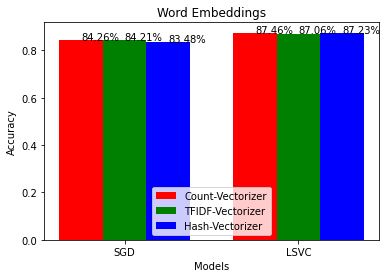

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(2)
width = 0.25

xvals = [SGDcount, LSVCcount]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [SGDtfidf, LSVCtfidf]
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = [SGDhash, LSVChash]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Models")
plt.ylabel('Accuracy')
plt.title("Word Embeddings")

plt.xticks(ind+width,['SGD', 'LSVC'])
plt.legend( (bar1, bar2, bar3), ('Count-Vectorizer', 'TFIDF-Vectorizer', 'Hash-Vectorizer') )
plt.annotate("{:.2%}".format(SGDcount), (0, SGDcount))
plt.annotate("{:.2%}".format(SGDtfidf), (0.25, SGDtfidf))
plt.annotate("{:.2%}".format(SGDhash), (0.50, SGDhash))
plt.annotate("{:.2%}".format(LSVCcount), (1, LSVCcount))
plt.annotate("{:.2%}".format(LSVCtfidf), (1.25, LSVCtfidf))
plt.annotate("{:.2%}".format(LSVChash), (1.50, LSVChash))
# plt.xlim([.8, 1.0])
plt.show()
